<a href="https://colab.research.google.com/github/Irwing18/Parte-pr-ctica-2/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import shapiro
import plotly.express as px
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, kendalltau
from scipy import stats
import math


In [5]:
from google.colab import files
uploaded = files.upload()



Saving BD-EEVV-Nacimientos-2023.csv to BD-EEVV-Nacimientos-2023.csv


In [6]:

io_csv = io.BytesIO(uploaded["BD-EEVV-Nacimientos-2023.csv"])
tabla = pd.read_csv(io_csv, sep = ",", index_col = 0, encoding = "latin-1")
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
23,417,1,1,NaN,1,8,5,2023,1,1,...,2,25/09/2015,2,2,2.0,44,99,99,1.0,1
11,1,1,1,NaN,2,6,4,2023,2,1,...,1,NaN,1,1,1.0,35,11,3,1.0,1
11,1,1,1,NaN,1,6,4,2023,7,1,...,1,NaN,1,1,1.0,32,9,6,1.0,1


In [44]:
tabla1 = tabla[["T_GES", "TALLA_NAC"]]
tabla1.head(8)

,T_GES,TALLA_NAC
COD_DPTO,,
23,4,5
11,4,4
11,4,4
11,4,5
11,4,5
5,4,4
5,3,4
52,4,5


In [45]:

df2 = tabla1[(tabla1.T_GES != 9) & (tabla1.TALLA_NAC != 9)]
df2.head(8)

,T_GES,TALLA_NAC
COD_DPTO,,
23,4,5
11,4,4
11,4,4
11,4,5
11,4,5
5,4,4
5,3,4
52,4,5


In [46]:
df2.T_GES = df2.T_GES.astype(str)
df2.TALLA_NAC = df2.TALLA_NAC.astype(str)

<ipython-input-46-8dc32f4239d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES = df2.T_GES.astype(str)
<ipython-input-46-8dc32f4239d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC = df2.TALLA_NAC.astype(str)


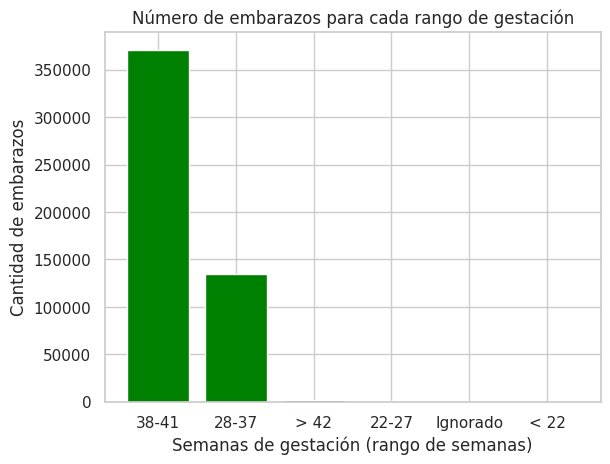

In [47]:
df2.loc[(df2.T_GES == "1"), "T_GES"], df2.loc[(df2.T_GES == "2"), "T_GES"], df2.loc[(df2.T_GES == "3"), "T_GES"] = "< 22", "22-27", "28-37"
df2.loc[(df2.T_GES == "4"), "T_GES"], df2.loc[(df2.T_GES == "5"), "T_GES"], df2.loc[(df2.T_GES == "6"), "T_GES"] = "38-41", "> 42", "Ignorado"
df2.loc[(df2.T_GES == "9"), "T_GES"] = "SD"
x_values = df2.T_GES.unique()
y_values = df2.T_GES.value_counts().tolist()
plt.bar(x_values, y_values, color = "green")
plt.title("Número de embarazos para cada rango de gestación")

plt.xlabel("Semanas de gestación (rango de semanas)")
plt.ylabel("Cantidad de embarazos")
plt.show()

De 38 a 41 semanas es el rango de semanas de gestación que mas se tiene en Colombia con más 350000 embarazos en este intervalo. El rango de 22 a 27 semanas y de menos de 22 semanas de gestación tienen menos de 50000 embarazos en estos intervalos. Por último, el rango de 28 a 37 semanas tiene menos de 150000 embarazos en este intervalo.


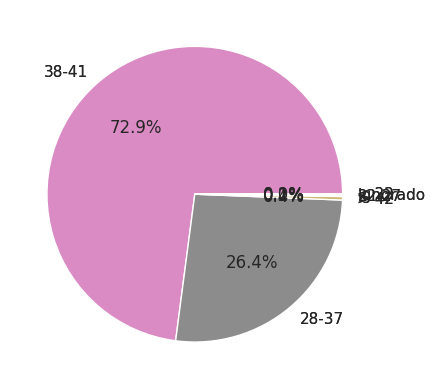

['38-41' '28-37' '> 42' '22-27' 'Ignorado' '< 22']
[72.93048521403149, 26.43590061062011, 0.383234380251048, 0.1529006911975976, 0.09374502532294866, 0.003734078576805083]


In [48]:
sizes = np.array(y_values)
plt.pie(y_values, labels = x_values)
plt.pie(sizes, labels = x_values, autopct = "%1.1f%%")
porcentaje = [x/len(df2.T_GES)*100 for x in y_values]
plt.show()
print(x_values)
print(porcentaje)



El rango de 38-41 semanas de gestación corresponde al 72.9% del número de embarazos en Colombia que duran esta cantidad de tiempo, de 28-37 corresponde al 26.4%, de más de 42 semanas corresponde al 0.38%, los datos ignorados corresponden a un 0.15% y los embarazos con menos de 22 semanas corresponden al 0.09%.

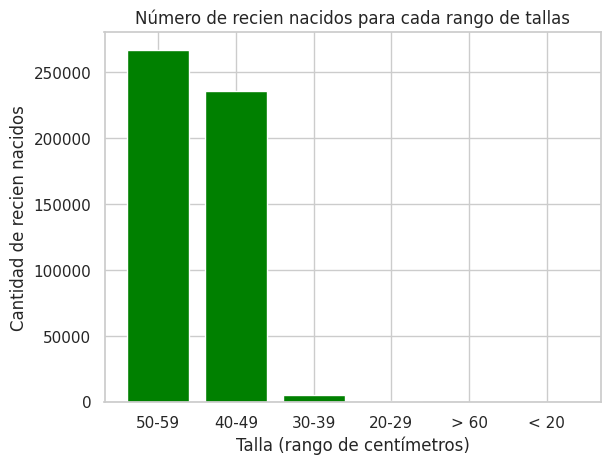

In [49]:
df2.loc[(df2.TALLA_NAC == "1"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == "2"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == "3"), "TALLA_NAC"] = "< 20", "20-29", "30-39"
df2.loc[(df2.TALLA_NAC == "4"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == "5"), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == "6"), "TALLA_NAC"] = "40-49", "50-59", "> 60"
df2.loc[(df2.TALLA_NAC == "9"), "TALLA_NAC"] = "SD"
x_values = df2.TALLA_NAC.unique()
y_values = df2.TALLA_NAC.value_counts().tolist()
plt.bar(x_values, y_values, color = "green")
plt.title("Número de recien nacidos para cada rango de tallas")

plt.xlabel("Talla (rango de centímetros)")
plt.ylabel("Cantidad de recien nacidos")
plt.show()

De 50 a 59 centímetros es el rango de la talla de un recien nacido que mas se tiene en Colombia con más 250000 recien nacidos en este intervalo. El rango de talla de 30 a 39 centímetros, el rango de 20 a 20 centímetros, el rango menor de 20 centrímetros y el mayor de 60 centímetros tienen menos de 50000 recien nacidos en dichas tallas. Por último, el rango de 40 a 49 centímetros tiene menos de 250000 y más de 200000 recien nacidos en este intervalo.

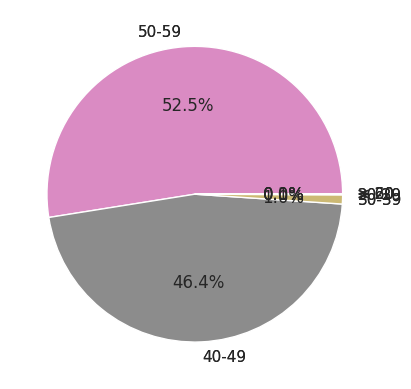

['50-59' '40-49' '30-39' '20-29' '> 60' '< 20']
[52.516867225992335, 46.421475275486564, 0.9966059191041355, 0.060334848583113714, 0.0039306090282158765, 0.0007861218056431753]


In [50]:
sizes = np.array(y_values)
plt.pie(y_values, labels = x_values)
plt.pie(sizes, labels = x_values, autopct = "%1.1f%%")
porcentaje = [x/len(df2.TALLA_NAC)*100 for x in y_values]
plt.show()
print(x_values)
print(porcentaje)

El rango de talla de 50 a 59 centímetros corresponde al 52.5%% del número de recien nacidos en Colombia, de 40 a 49 centímetros corresponde al 46.4%, de 30 a 39 centímetros corresponde al 0.99%, los recien nacidos con tallas mayores a 60 centrímetros corresponden a un 0.06% y los recien nacidos con una talla inferior a los 20 centímetros corresponden al 0.003%.

Tablas de contingencia


*   Representación gráfica de una tabla de contingencia
*   Proporciones asociadas a una tabla de contingencia



In [51]:
tabla_cont = pd.crosstab(df2.T_GES, df2.TALLA_NAC)
tabla_cont

TALLA_NAC,20-29,30-39,40-49,50-59,< 20,> 60
T_GES,,,,,,
22-27,251,1646,50,1,2,0
28-37,44,3357,95455,35657,0,0
38-41,0,46,140106,230919,0,19
< 22,11,5,0,1,2,0
> 42,0,0,116,360,0,1
Ignorado,1,17,478,282,0,0


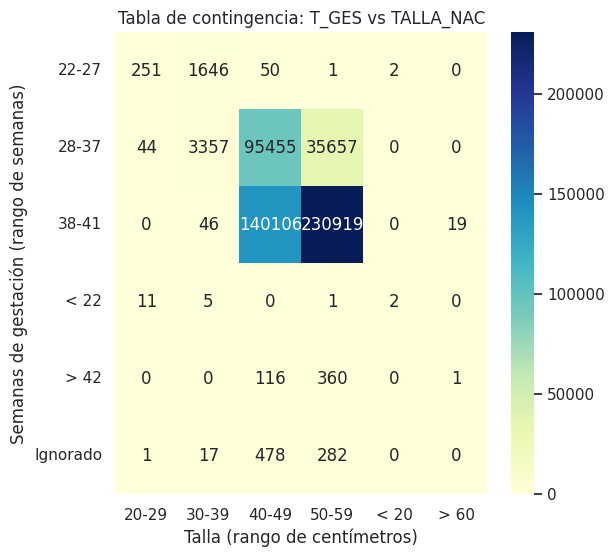

In [54]:
sns.set(style = "whitegrid")
plt.figure(figsize = (6, 6))
heatmap = sns.heatmap(tabla_cont, annot = True, cmap = "YlGnBu", fmt = "d", cbar = True)
plt.title("Tabla de contingencia: T_GES vs TALLA_NAC")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 0, ha = "center")
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation = 0, ha = "right")
plt.xlabel("Talla (rango de centímetros)")
plt.ylabel("Semanas de gestación (rango de semanas)")
plt.show()

In [55]:
len(df2.T_GES)

508827

In [68]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es: {chi}")
print(f"El valor p es: {valor_p}")


El valor de la estadística Chi cuadrado es: 283302.7467337463
El valor p es: 0.0




*   Si el valor p es menor que 0.05 se rechaza la hipótesis nula
*   Si el valor p es mayor que 0.05 no se rechaza la hipótesis nula

como el valor p = 0 < 0.05 se rechaza la hipótesis nula. Entonces, no se rechaza con una confianza del 95% que número de semanas de gestación y la talla de un recien nacido en Colombia estén asociadas.



In [71]:
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.T_GES)))
coeficiente_phi = math.sqrt(chi/len(df2.TALLA_NAC))
coeficiente_v_cramer = math.sqrt(chi/(len(df2.T_GES)*min(6-1, 6-1)))
print(f"El coeficiente de contingencia, el coeficiente phi y el coeficiente V de cramer están dados respectivamente por: {coeficiente_contingencia}, {coeficiente_phi}, {coeficiente_v_cramer}")

El coeficiente de contingencia, el coeficiente phi y el coeficiente V de cramer están dados respectivamente por: 0.5980358668183134, 0.7461743542999918, 0.3336993158563588


De acuerdo con el artículo Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174.[link](https://www.jstor.org/stable/2529310) se tiene que el número de semanas de gestación y la talla de un recien nacido en colombia están moderadamente relacionados.